In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt
# Solution for adding years https://miguendes.me/how-to-use-datetimetimedelta-in-python-with-examples#how-to-add-years-to-a-datetime-in-python 
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [11]:
# Using the inspector to print the column names within the 'station' table and its types
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Using the inspector to print the column names within the 'measurement' table and its types
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

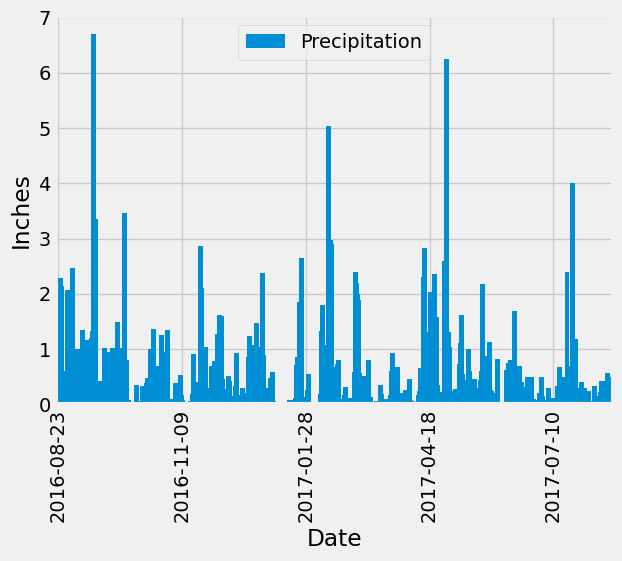

In [197]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set. Using relativedelta accounts for leap years where applicable
year_ago = latest_date - relativedelta(years=1)

# Perform a query to retrieve the data and precipitation scores
past_year_info = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
past_year_df = pd.DataFrame(past_year_info, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
past_year_df = past_year_df.sort_values(by='Date', ascending=True)
past_year_df = past_year_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = past_year_df.plot(kind='bar', width=20, capstyle='round')  # Setting bar width and capstyle
ax.xaxis.set_major_locator(plt.MaxNLocator(5))  # Display only 5 tick labels
plt.ylabel('Inches') # Adding y label

plt.show()


In [198]:
# Use Pandas to calculate the summary statistics for the precipitation data
past_year_stats = past_year_df.describe()
past_year_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [211]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station.distinct()))


SELECT count(DISTINCT station.station) AS count_1 
FROM station


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Station.station, Station.)

In [208]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_list = session.query(Measurement.station)
print(station_list)

SELECT measurement.station AS measurement_station 
FROM measurement


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

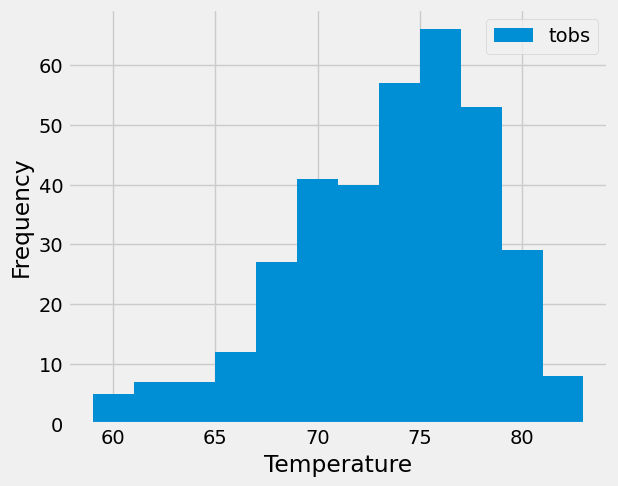

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()